In [ ]:
import torch 
import torch.nn as nn #para implementar capas 
import torch.nn.functional as F #capas de parametros

CREAMOS NUESTRA RED NEURONAL

In [ ]:
#implementacion de nuestra red neuronal 
class Net(nn.Module):#una red es una clase que se hereda de un modulo
  def __init__(self, num_channels): #aqui se ponen las capas que tengan paramatros en este caso la cantidad de canales por el cual expandiara la imagen 
    super(Net,self).__init__()  #inicializamos la clase padre

    self.num_channels = num_channels

    # capas de la red en este caso 5 capas
    # 3 convulucionales

    self.conv1 = nn.Conv2d(3,self.num_channels,3,stride = 1,padding=1) #cada capa recibe los siguientes parametros (canales de entrada, canales de salida ,kernel = 3,stride = 1 ,padding = 1) los ultimos tre parametros se usan para no modificar el tamaño de la imagen   
    self.conv2 = nn.Conv2d(self.num_channels,self.num_channels*2,3,stride = 1,padding=1) # expandimos la red
    self.conv3 = nn.Conv2d(self.num_channels*2,self.num_channels*4,3,stride = 1,padding=1) #segumos expandiendo la red

    # y 2 capas lineales 
    self.fc1 = nn.Linear(self.num_channels*4*8*8,self.num_channels*4)
    self.fc2 = nn.Linear(self.num_channels*4,6)

    def forward (self , x ):
      #usamos maxpool(para dividir el tamaño de la imagen )
      ##empieza  por una imagen de 3 canales de 64 px x 64 px 3x64x64
      x = self.conv1(x) #num_channels  x 64 x 64
      x = F.relu(F.max_pool2d(x,2)) #num_channels x 32 x 32
      x = self.conv2(x) #num_channels * 2 x 32 x 32 
      x = F.relu(F.max_pool2d(x,2))# num_channels *2 x 16 x 16
      x = self.conv3(x)# num_channels *4 x 16 x 16
      x = F.relu(F.max_pool2d(x,2))#num_channels *4 x 8 x 8
      #flatten
      #Implementamos las capas lineales 
      #-1 idica que haremos el flatten
      #sitaxis x.view(-1,tamanio del tensor)
      x = x.view(-1,self.num_channels*4*8*8) 

      #fc 
      x = self.fc1(x)
      x = F.relu(x)
      x = self.fc2(x)

      #log_sofmax
      #esta funcion nos permite tener probalidades al final y hacer una clasificacion multiclase 
      #
      x = F.log_softmax(x,dim=1)

      return x

CARGAMOS LOS DATOS A NUESTRA RED

In [ ]:
#importamos nuestro Drive dandole acceso a nuestro goggle drive 
from google.colab import drive 
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
#nos aseguramos de que es lo que tenemos en nuestro DataSet
!ls '/gdrive/My Drive/dl-pytorch/datasets/64x64_SIGNS'

test_signs  train_signs  val_signs


In [ ]:
#importamos las librerias de ploting 
import sys 
sys.path.append('/gdrive/My Drive/dl-pytorch/')

In [ ]:
#importamos plothelpers del propio drive
from plot_helpers import imshow

In [ ]:
##empezamos con el montaje del dataSet
#en este caso se hereda de otra clase de pytorch
# dentro de la clase tendremos tres metodos (init(que setteara todos los atrubutos),lenght(catidad de imagenes del dataset),getItem(esta ligado a una lista para acceder a un elemento de la lista ))
import os
from PIL import Image
from torch.utils.data import Dataset, DataLoader

class SINGSDataset(Dataset):
  #los paremtros que tendra el primer metodo (self,direccionDataset,splitde datos, Pipelines de procesamiento)
  def __init__(self, base_dir,split="train",transform=None):
    #definimos el camino al directorio de las imagenes
    path = os.path.join(base_dir,"{}_signs".format(split))
    #vemos todos los archivos dentro de la ruta
    files = os.listdir(path)

    self.filenames = [os.path.join(path,f) for f in  files if f.endswith (".jpg")]

    self.targets = [int(f[0]) for f in files]
    self.transform = transform

  def __len__(self):
    return len (self.filenames)

  def __getitem__(self,idx):
    image=Image.open(self.filenames[idx])
    if self.transform:
      image = self.transform(image)
    return image, self.targets[idx]

In [ ]:
#cargamos el dataset
signs = SINGSDataset('/gdrive/My Drive/dl-pytorch/datasets/64x64_SIGNS', split="train")

In [ ]:
len(signs)

864

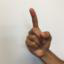

In [ ]:
signs[0][0]